In [22]:
import pandas as pd

In [23]:
df = pd.read_csv('jfkDatafinal.csv')

In [24]:
df.head()

,searchDate,flightDate,startingAirport,elapsedDays,isBasicEconomy,isRefundable,isNonStop,baseFare,totalFare,seatsRemaining,...,segmentsEquipmentDescription,segmentsCabinCode,Hour,Minute,searchMonth,flightMonth,searchDay,flighthDay,dayDiff,totalDuration
0,2022-04-16,2022-04-23,ORD,0,0,0,0,519.07,581.6,2,...,Boeing 737-800,coach,6,6,April,April,Saturday,Saturday,7,366
1,2022-04-16,2022-04-20,LAX,0,0,0,0,278.14,322.6,2,...,Airbus A321,coach,7,24,April,April,Saturday,Wednesday,4,444
2,2022-04-17,2022-04-19,ORD,0,0,0,0,453.95,517.2,1,...,Embraer 175 (Enhanced Winglets),coach,10,9,April,April,Sunday,Tuesday,2,609
3,2022-04-17,2022-04-26,SFO,1,0,0,1,245.58,278.6,7,...,Airbus A319-321,coach,5,36,April,April,Sunday,Tuesday,9,336
4,2022-04-16,2022-04-17,LAX,0,0,0,1,327.44,366.6,7,...,Airbus A319-321,coach,5,37,April,April,Saturday,Sunday,1,337


In [25]:
df.dtypes

searchDate                       object
flightDate                       object
startingAirport                  object
elapsedDays                       int64
isBasicEconomy                    int64
isRefundable                      int64
isNonStop                         int64
baseFare                        float64
totalFare                       float64
seatsRemaining                    int64
totalTravelDistance             float64
segmentsAirlineName              object
segmentsEquipmentDescription     object
segmentsCabinCode                object
Hour                              int64
Minute                            int64
searchMonth                      object
flightMonth                      object
searchDay                        object
flighthDay                       object
dayDiff                           int64
totalDuration                     int64
dtype: object

In [26]:
df.shape

(426978, 22)

In [27]:
df = df.dropna()

In [28]:
df.describe()

,elapsedDays,isBasicEconomy,isRefundable,isNonStop,baseFare,totalFare,seatsRemaining,totalTravelDistance,Hour,Minute,dayDiff,totalDuration
count,418550.000000,418550.000000,418550.000000,418550.000000,418550.000000,418550.000000,418550.000000,418550.000000,418550.000000,418550.000000,418550.000000,418550.000000
mean,0.202497,0.128936,0.000012,0.371411,324.685988,370.888558,6.543741,1443.656149,6.188709,29.834956,27.046738,401.157475
std,0.401861,0.335129,0.003456,0.483183,200.564009,218.244179,2.383979,889.687888,3.700401,17.146688,16.164531,221.408543
min,0.000000,0.000000,0.000000,0.000000,26.980000,43.600000,1.000000,121.000000,0.000000,0.000000,1.000000,12.000000
25%,0.000000,0.000000,0.000000,0.000000,166.520000,198.600000,6.000000,762.000000,3.000000,15.000000,13.000000,221.000000
50%,0.000000,0.000000,0.000000,0.000000,302.330000,347.610000,7.000000,1104.000000,6.000000,29.000000,26.000000,364.000000
75%,0.000000,0.000000,0.000000,1.000000,450.230000,510.100000,9.000000,2458.000000,9.000000,45.000000,40.000000,551.000000
max,1.000000,1.000000,1.000000,1.000000,4416.740000,4762.600000,10.000000,4498.000000,23.000000,59.000000,60.000000,1433.000000


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf

In [38]:
# Split the data into training and testing sets
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
variable = 'baseFare~' + '+'.join([col for col in df_train.columns if col not in ['baseFare','searchDate','flightDate','Hour','Minute','totalFare', 'searchDay']])
# Fit the model using StatsModels for p-values
model = smf.ols(variable, df)
results = model.fit()


print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               baseFare   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     7589.
Date:                Thu, 11 Apr 2024   Prob (F-statistic):               0.00
Time:                        11:40:44   Log-Likelihood:            -2.6190e+06
No. Observations:              418550   AIC:                         5.238e+06
Df Residuals:                  418465   BIC:                         5.239e+06
Df Model:                          84                                         
Covariance Type:            nonrobust                                         
                                                                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

What independent variable are significant to predicting base fare?

With an R-squared value of 60.4%, the model demonstrates a reasonable fit with the independent variables, and most of these variables are statistically significant with p-values less than 0.05 for predicting the base fare. However, there seems to be multicollinearity among the variables, which may be impacting the model's predictive performance. Despite this, the intercept suggests that the model effectively captures and explains the relationship between the independent variables and the target variable, base fare.

What does the data tell us?

1. The starting airport significantly influences base fare, with OAK having the highest and BOS the lowest, likely due to their distances from the destination JFK.
2. Southern Airways Express emerges as the most economical airline, while Delta is the priciest choice.
3. Airline carriers and equipment descriptions affect base fare, with the Boeing 737 being notably expensive.
4. Unsurprisingly, first-class cabins are more costly than premium and coach.
5. Base fare fluctuates by month, with June being expensive, possibly due to vacation season, and November being more affordable, possibly due to winter and holidays (flight volume could be a reason, which can be further explored)
6. Choosing to fly on a Tuesday tends to result in cheaper fares, whereas Sundays are typically the most expensive.
7. Interestingly, refundable flights are associated with higher base fares, likely due to the flexibility they offer.

In [39]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Calculate predictions on the test set
df_test['predicted_baseFare'] = results.predict(df_test)

# Calculate accuracy - R-squared
accuracy = r2_score(df_test['baseFare'], df_test['predicted_baseFare'])

print("Accuracy (R-squared):", accuracy)

Accuracy (R-squared): 0.5992352219036157


The model works fine with test data with an R-square of 60% (appr.) which leaves a room for improvement.

To tackle the multicollinearity concern and understand the non-linear relationship, I opted for the Random Forest Classifier. This choice was made due to its effectiveness in handling categorical variables, its ability to grasp the non-linear underlying patterns and trends in the data, less affected by outliers leading to improved base fare predictions.

In [40]:
from sklearn.ensemble import RandomForestRegressor

# Assuming df_train and df_test are already split
variables = [
    'elapsedDays', 'seatsRemaining', 'dayDiff', 'totalDuration',
    'startingAirport', 'isBasicEconomy', 'isNonStop', 'isRefundable',
    'segmentsEquipmentDescription', 'segmentsCabinCode',
    'searchMonth','flightMonth', 'searchDay', 'flighthDay', 'totalTravelDistance', 'segmentsAirlineName'
]

# Convert categorical variables using One-Hot Encoding
df_train_encoded = pd.get_dummies(df_train[variables], drop_first=True)
df_test_encoded = pd.get_dummies(df_test[variables], drop_first=True)

# Define features and target
X_train = df_train_encoded
y_train = df_train['baseFare']

X_test = df_test_encoded
y_test = df_test['baseFare']

In [41]:
# Ensure X_train and X_test have the same columns and order
X_train = X_train[X_test.columns]

# Train Random Forest
rf_model = RandomForestRegressor(n_estimators=10, random_state=42)
rf_model.fit(X_train, y_train)

# Ensure X_test has the same columns and order
X_test = X_test[X_train.columns]

# Make predictions
rf_predictions = rf_model.predict(X_test)

In [42]:
#Calculate r-square
r2 = r2_score(y_test, rf_predictions)
print("R-squared:", r2)

R-squared: 0.8675243707783145


How did Random Forest model perform in comparison with Linear Regression?

The model shows a strong ability to capture patterns and trends in the data, outperforming the Linear Regression model with an impressive R-squared value of 86.75%.

Question 1: Which airport has most number of flights to JFK and Why?

Los Angeles (LAX) has most number of flights to JFK. Even though mean base fare of LAX airport is greater than overall base fare, the demand is high.

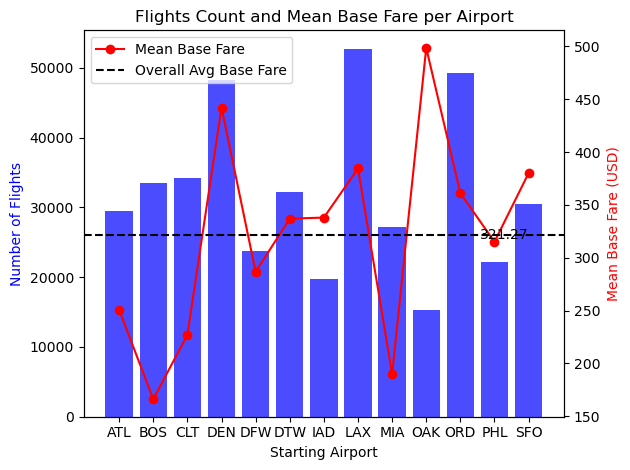

In [50]:
import matplotlib.pyplot as plt

# Group data by startingAirport and calculate mean base fare and count
base_fare = df.groupby('startingAirport')['baseFare'].mean()
count = df.groupby('startingAirport').size()

# Create the figure and axis
fig, ax1 = plt.subplots()

# Bar plot for number of flights
airports = count.index
ax1.bar(airports, count, color='b', alpha=0.7)
ax1.set_xlabel('Starting Airport')
ax1.set_ylabel('Number of Flights', color='b')

# Twin the axis for mean base fare
ax2 = ax1.twinx()
ax2.plot(airports, base_fare, 'r-', marker='o', label='Mean Base Fare')
ax2.set_ylabel('Mean Base Fare (USD)', color='r')

# Horizontal line for overall average base fare
overall_avg_base_fare = base_fare.mean()
ax2.axhline(overall_avg_base_fare, linestyle='--', color='black', label='Overall Avg Base Fare')
ax2.text(len(airports)-1, overall_avg_base_fare, f'{overall_avg_base_fare:.2f}', va='center', ha='right')

# Rotate x-axis labels for better visibility
plt.xticks(airports, rotation=45)

# Title and legend
plt.title('Flights Count and Mean Base Fare per Airport')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()